# Show Position

- author Sylvie Dagoret-Campagne
- creation date : May 2018
- affliliation : CNRS/IN2P3
- project : DESC-LSST

### import

In [45]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import sys
import os
import pandas as pd
import numpy as np
import glob
from matplotlib.backends.backend_pdf import PdfPages 

In [46]:
import seaborn as sns

In [47]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),   #defines the default image size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [49]:
plt.rcParams.update({'figure.max_open_warning': 0}) # to see a large number of files

In [93]:
jet =plt.get_cmap('jet') 
thecm = plt.cm.get_cmap('jet')   

In [51]:
files=["x_y_guess.csv","x_y_guess2.csv","xy_pointing.csv"]

In [100]:
def Trajectory(filename,xname="x_guess",yname="y_guess",XMIN=700.,XMAX=800.,YMIN=650.,YMAX=750.):
    df=pd.read_csv(filename)
    N=len(df)
    jet =plt.get_cmap('jet') 
    cNorm  = colors.Normalize(vmin=0, vmax=N)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    X=df[xname]
    Y=df[yname]
    idx=np.arange(N)
    all_colors=scalarMap.to_rgba(idx,alpha=1)
    all_colors=np.array(all_colors)
    plt.figure(figsize=(4,4))

    sc=plt.scatter(X,Y,marker='o',vmin=0, vmax=N,color=all_colors,cmap=jet)
    plt.xlim(XMIN,XMAX)
    plt.ylim(YMIN,YMAX)
    plt.grid()
    plt.show()

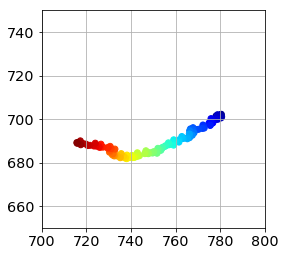

In [101]:
Trajectory(files[0])

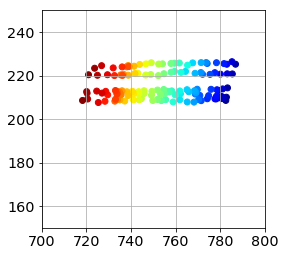

In [106]:
Trajectory(files[1],xname="x_guess2",yname="y_guess2",XMIN=700.,XMAX=800.,YMIN=150.,YMAX=250)

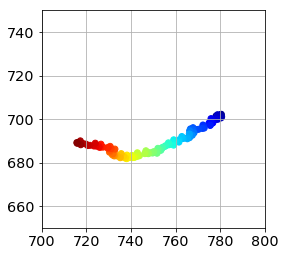

In [120]:
Trajectory(files[2],xname="x_pointing",yname="y_pointing",XMIN=700.,XMAX=800.,YMIN=650.,YMAX=750)

In [118]:
df=pd.read_csv(files[2])

In [119]:
df.head()

,Unnamed: 0,theta,x_pointing,y_pointing
0,0,-0.631328,1030.025465,1020.398734
1,1,-0.722093,778.059753,701.467092
2,2,-0.618445,780.418868,702.197768
3,3,-0.720939,780.180103,702.117571
4,4,-0.967047,780.161781,700.943758


In [109]:
N=len(df)

In [110]:
cNorm  = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

In [112]:
X=df["x_guess2"]
Y=df["y_guess2"]

In [113]:
idx=np.arange(N)

In [114]:
all_colors=scalarMap.to_rgba(idx,alpha=1)
all_colors=np.array(all_colors)

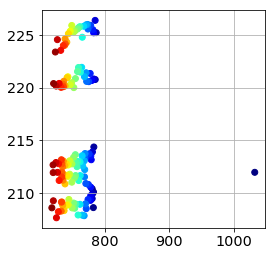

In [116]:
plt.figure(figsize=(4,4))

sc=plt.scatter(X,Y,marker='o',vmin=0, vmax=N,color=all_colors,cmap=jet)
#plt.xlim(700.,800.)
#plt.ylim(650.,750.)
plt.grid()
#plt.colorbar(sc)
#plt.colorbar(ticks=range(N), label='digit value')

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
im=ax.scatter(X,Y,color=all_colors)
ax.set_xlim(700.,800.)
ax.set_ylim(650.,750.)
ax.grid()
#plt.colorbar(im, cax=ax, orientation='horizontal')